<a href="https://colab.research.google.com/github/BitanGh/udemy/blob/main/Student_Performance_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Basic Libraries Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Data reading

In [2]:
df = pd.read_csv('/content/Student_Performance.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [3]:
#Dropping some of the columns
df.drop(['Extracurricular Activities','Sleep Hours','Sample Question Papers Practiced'],axis=1,inplace=True)
df.head()

,Hours Studied,Previous Scores,Performance Index
0,7,99,91.0
1,4,82,65.0
2,8,51,45.0
3,5,52,36.0
4,7,75,66.0


In [4]:
df.corr()

,Hours Studied,Previous Scores,Performance Index
Hours Studied,1.00000,-0.012390,0.373730
Previous Scores,-0.01239,1.000000,0.915189
Performance Index,0.37373,0.915189,1.000000


In [5]:
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Performance Index,0


Getting Dependent and Independent Features


In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X.head()

,Hours Studied,Previous Scores
0,7,99
1,4,82
2,8,51
3,5,52
4,7,75


from matplotlib import pyplot as plt
_df_0['Hours Studied'].plot(kind='hist', bins=20, title='Hours Studied')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Previous Scores'].plot(kind='hist', bins=20, title='Previous Scores')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Hours Studied', y='Previous Scores', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Hours Studied'].plot(kind='line', figsize=(8, 4), title='Hours Studied')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Previous Scores'].plot(kind='line', figsize=(8, 4), title='Previous Scores')
plt.gca().spines[['top', 'right']].set_visible(False)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

<Axes: xlabel='Previous Scores', ylabel='Performance Index'>

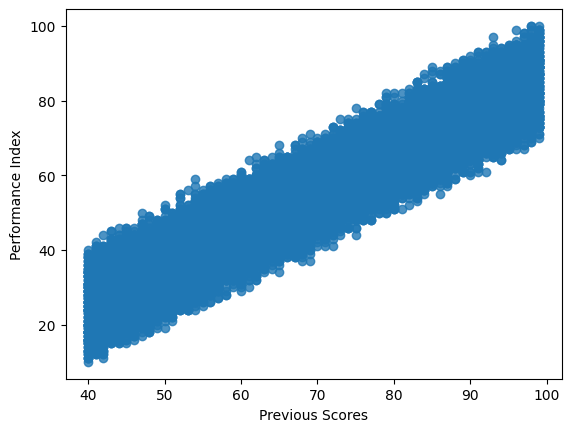

In [9]:

sns.regplot(x='Previous Scores', y='Performance Index', data=df)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
X_train
X_test

array([[-0.3772178 , -0.14349687],
       [ 1.16412434, -0.54558833],
       [ 0.39345327,  1.17766078],
       ...,
       [ 1.16412434, -1.1200047 ],
       [ 0.77878881,  0.20115295],
       [ 0.39345327,  1.34998569]])

In [12]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [13]:
from sklearn.model_selection import cross_val_score

In [17]:
validation_score = cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
np.mean(validation_score)

-5.234300632790121

In [19]:
#Prediction
y_pred = regression.predict(X_test)
y_pred

array([49.90105409, 54.19307689, 79.07865665, ..., 43.99247645,
       64.59574668, 82.13883679])

MSE,MAE,RMSE

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error :",mse)
print("Mean Absolute Error :",mae)
print("Root Mean Squared Error :",rmse)

Mean Squared Error : 5.170070897773745
Mean Absolute Error : 1.8199696404710202
Root Mean Squared Error : 2.2737789905295864


R Squared Value

In [23]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R-squared value :",r2)

R-squared value : 0.9853971924324728


In [27]:
regression.predict(sc.transform([[10,98]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([98.67158011])

Co-Efficient and Intercept Values

In [28]:
print("The value of Coefficient or Slope :",regression.coef_)
print("The value of Intercept :",regression.intercept_)

The value of Coefficient or Slope : [ 7.41720012 17.75819939]
The value of Intercept : 55.24719999999999


Using OLS MEthod

In [29]:
import statsmodels.api as sm

In [30]:
model = sm.OLS(y_train,X_train).fit()

In [31]:
prediction = model.predict(X_test)
prediction

array([ -5.34614591,  -1.05412311,  23.83145665, ..., -11.25472355,
         9.34854668,  26.89163679])

In [32]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:      Performance Index   R-squared (uncentered):                   0.108
Model:                            OLS   Adj. R-squared (uncentered):              0.107
Method:                 Least Squares   F-statistic:                              452.3
Date:                Sat, 24 Aug 2024   Prob (F-statistic):                   3.51e-186
Time:                        06:09:31   Log-Likelihood:                         -40737.
No. Observations:                7500   AIC:                                  8.148e+04
Df Residuals:                    7498   BIC:                                  8.149e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------